<a href="https://colab.research.google.com/github/AkanshuMittal/AI-and-ML-Project/blob/main/Rice_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing ML Libraries
import numpy as np
import pandas as pd
import os
import pathlib
# Importing DL Libraries
import tensorflow as tf
from tensorflow import keras
# Importing for accessing pre-trained models
import tensorflow_hub as hub
# Importing for separating train and test data
from sklearn.model_selection import train_test_split
# Importing libraries for Visualization
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2


In [10]:
from google.colab import files
uploaded = files.upload()



Saving archive.zip to archive.zip


In [11]:
zip_path = "/content/archive.zip"  # Ye aapke uploaded zip ka path hai
extract_path = "/content/archive"  # Folder yahan extract hoga



In [12]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Folder extracted at:", extract_path)


Folder extracted at: /content/archive


In [13]:
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['Rice_Image_Dataset']


In [14]:
data = "/content/archive/Rice_Image_Dataset"  # New path
data = pathlib.Path(data)



In [15]:
arborio = list(data.glob('Arborio/*'))[:600]
basmati = list(data.glob('Basmati/*'))[:600]
ipsala = list(data.glob('Ipsala/*'))[:600]
jasmine = list(data.glob('Jasmine/*'))[:600]
karacadag = list(data.glob('Karacadag/*'))[:600]

In [16]:
# Images Path
df_images = {
    'arborio': arborio,
    'basmati': basmati,
    'ipsala': ipsala,
    'jasmine': jasmine,
    'karacadag': karacadag
}

# Numerical Labels for the categories
df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4
}


In [17]:
# Convert into the numerical Arrays
img = cv2.imread(str(df_images['arborio'][0]))
# It provide the dimension of image
img.shape

(250, 250, 3)

In [18]:
# X = images, y = labels
X, y = [], []
for label, images in df_images.items():
  for image in images:
    img = cv2.imread(str(image))
# Resizing the images  to pass on MobileNetv2 model
    resized_img = cv2.resize(img, (224, 224))
    X.append(resized_img)
    y.append(df_labels[label])

In [19]:
# Standarizing
X = np.array(X)
x = X/255
y = np.array(y)

In [20]:
# Splitting the data into training, testing and validatioin sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)


In [36]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda

# Load MobileNet from TensorFlow Hub
mobile_net = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                            trainable=False)

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Wrap the KerasLayer with Lambda
x = Lambda(lambda img: mobile_net(img))(input_layer)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         128,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,256 (501.00 KB)

 Trainable params: 128,256 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


In [41]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - acc: 0.9776 - loss: 0.0663 - val_acc: 0.9628 - val_loss: 0.1103
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - acc: 0.9775 - loss: 0.0780 - val_acc: 0.9415 - val_loss: 0.1598
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - acc: 0.9778 - loss: 0.0764 - val_acc: 0.9468 - val_loss: 0.1039
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - acc: 0.9852 - loss: 0.0596 - val_acc: 0.9468 - val_loss: 0.1258
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - acc: 0.9852 - loss: 0.0527 - val_acc: 0.9574 - val_loss: 0.0980
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - acc: 0.9796 - loss: 0.0608 - val_acc: 0.9415 - val_loss: 0.1325
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.9846 - loss: 0.0557 - val_acc: 0.9840 - val_loss: 0.0854
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.9855 - loss: 0.0547 - val_acc: 0.9574 - val_loss: 0.1018
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9823 - lo

In [43]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 929ms/step - acc: 0.9440 - loss: 0.1741


[0.17355190217494965, 0.9412811398506165]

In [44]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       114
           1       0.93      0.97      0.95       110
           2       0.99      0.98      0.99       121
           3       0.96      0.90      0.93       103
           4       0.87      0.98      0.92       114

    accuracy                           0.94       562
   macro avg       0.94      0.94      0.94       562
weighted avg       0.94      0.94      0.94       562



In [47]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()


In [48]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
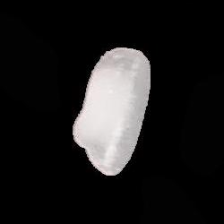

In [49]:
X_test[0]

In [50]:
X_test.shape

(562, 224, 224, 3)

In [51]:
a1 = cv2.imread('/content/archive/Rice_Image_Dataset/Arborio/Arborio (1).jpg')
a1 = cv2.resize(a1, (224, 224))
a1 = np.array(a1)
a1 = a1/255
a1 = np.expand_dims(a1, 0)
pred = model.predict(a1)
pred = pred.argmax()
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


24

In [59]:
for i, j in df_labels.items():
    if pred == j:
        print(i)


In [63]:
a2 = cv2.imread('/content/archive/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg')
a2 = cv2.resize(a2, (224,224))
a2 = np.array(a2)
a2 = a2/255
a2 = np.expand_dims(a2, 0)
a2.shape

(1, 224, 224, 3)

In [65]:
model.save("rice.h5")